In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Teorema de Karush-Kuhn-Tucker

Función objetivo $ f(x)=f(x1,x2,....xn)  $

Restricción de igualdad  $ g(x)=h(x1,x2,....xn)  $ 

Restricción de desigualdad $ h(x)=g(x1,x2,....xn)  $

### - Condiciones
Los escalares 𝜆1, ... , 𝜆𝑝 son asociados a las restricciones de igualdad y se denominan multiplicadores de Lagrange

Los escalares 𝜇1, ... , 𝜇𝑞 son asociados a las restricciones de desigualdad y se denominan multiplicadores de Karush-Kuhn-Tucker

El teorema de Karush-Kuhn-Tucker solo aporta una condición necesaria, y no suficiente, de existencia de solución del programa

En la práctica, si se sabe de antemano que existe un punto 𝒙∗ ∈ 𝛺 que es solución de (PM), entonces 𝒙∗ cumple las siguientes condiciones:

#### Condición estacionaria: 
$$ \triangledown f(x,y,x) + \lambda \triangledown g_{i}(x) +\mu \triangledown h_{i}(x)$$

#### Condición de Factibilidad:
$ g_{i}(x)=0 $ , para i=1,.......m
,Esta condición garantiza que lo óptimo satisfaga las limitaciones de igualdad.

$ h_{i}(x)=0 $ , para j=1,.......n
,Esta condición garantiza que el punto optimo est een la region factible.
#### Condición Holgura: 
$ \mu*h_{j}(x*)=0 $ , para j=1,.......n
#### Condición deSigno: 
$\lambda_{0} >=0,\mu_{j}>=0$,para mínimo condicionado

$\mu_{j}<=0$,para maximo condicionado

### - /-/-/-/- Ejemplo

Optimizar  
$$ f(x,y,x) = x+y+z $$
sujeto a 
$$ (y-1)^2+z^2 <=1 $$
$$ x^2+(y-1)^2+z^2 <=3 $$
Resolviendo

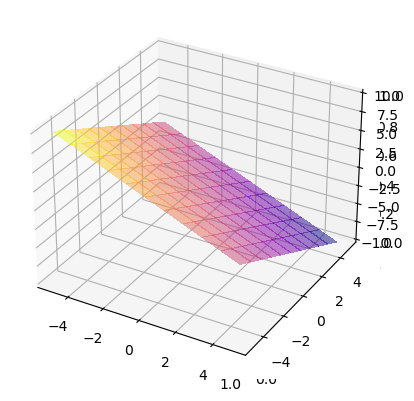

In [16]:
# plotting
x=np.linspace(-5,5,11)
y=np.linspace(-5,5,11) 
X, Y = np.meshgrid(x,y)
Z1=-X-Y
plt.show()
fig = plt.figure()
grafica = fig.add_subplot(111, projection='3d') # Sumar ecuaciones de graficos
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z1, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)

#### Condición estacionaria: 
$ \triangledown f(x,y,x) +\mu \triangledown h_{i}(x)=0$

In [17]:
from sympy import symbols
x,y,z,u1,u2=symbols('x y z u1 u2')
F=x+y+z
h1=(y-1)**2+z**2
h2=x**2+(y-1)**2+z**2-3
Ec=F+u1*h1+u2*h2
print('Ec:',Ec)

Ec: u1*(z**2 + (y - 1)**2) + u2*(x**2 + z**2 + (y - 1)**2 - 3) + x + y + z


In [18]:
#Hallando los gradientes
Ec_dx=Ec.diff(x)
Ec_dy=Ec.diff(y)
Ec_dz=Ec.diff(z)
print('Ec/dx:',Ec_dx)
print('Ec/dy:',Ec_dy)
print('Ec/dz:',Ec_dz)


Ec/dx: 2*u2*x + 1
Ec/dy: u1*(2*y - 2) + u2*(2*y - 2) + 1
Ec/dz: 2*u1*z + 2*u2*z + 1


#### Condición de holgura: 



In [19]:
Ec_du1=Ec.diff(u1)
Ec_du2=Ec.diff(u2)
print('Ec/du1:',Ec_du1)
print('Ec/du2:',Ec_du2)

Ec/du1: z**2 + (y - 1)**2
Ec/du2: x**2 + z**2 + (y - 1)**2 - 3


Ec/du1:
$$ (y-1)^2+z^2 =1 $$
Ec/du2:
$$ x^2+(y-1)^2+z^2 =3 $$
Resolviendo  Ec/du1 y Ec/du2
$$ x =\pm \sqrt{2} $$
Una solucion por inspeccion 
$$ y =1 $$

In [20]:
from sympy.solvers import solve
x_sol1=pow( 2, 1/2)
x_sol2=-pow( 2, 1/2)
Ec_dx_1=Ec_dx.subs(x,x_sol1)# Evaluando con + raiz(2)
Ec_dx_2=Ec_dx.subs(x,x_sol2)#Evaluando con -raiz(2)
u2_sol1=solve(Ec_dx_1, u2)
u2_sol2=solve(Ec_dx_2, u2)
print('u2_sol1:',u2_sol1)
print('u2_sol2:',u2_sol2)

u2_sol1: [-0.353553390593274]
u2_sol2: [0.353553390593274]


In [25]:
Ec2_dy=Ec_dy.subs(u2,-0.35)
print('Ec_dy: ',Ec2_dy)
Ec2_dz=Ec_dz.subs(u2,-0.35)
print('Ec_dz: ',Ec2_dz)
solutione = solve((Ec2_dy,Ec2_dz), (u1,y))
print(solutione)

Ec_dy:  u1*(2*y - 2) - 0.7*y + 1.7
Ec_dz:  2*u1*z - 0.7*z + 1
[(0.05*(7.0*z - 10.0)/z, z + 1.0)]


$$ \dfrac{+y>=-1}{x-1} $$

$$ \bigtriangledown \Delta $$ 
$$ \blacktriangledown $$

In [45]:
1/(2*pow( 2, 1/2))

0.35355339059327373